**Load the dataset safely, inspect structure, handle missing values.**

In [13]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("dataset/healthcare-dataset-stroke-data.csv")

# Display first 5 rows
print(data.head())

# Dataset info
print(data.info())

# Check missing values
print(data.isnull().sum())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

**Understand whether the dataset is imbalanced.**

stroke
0    4861
1     249
Name: count, dtype: int64


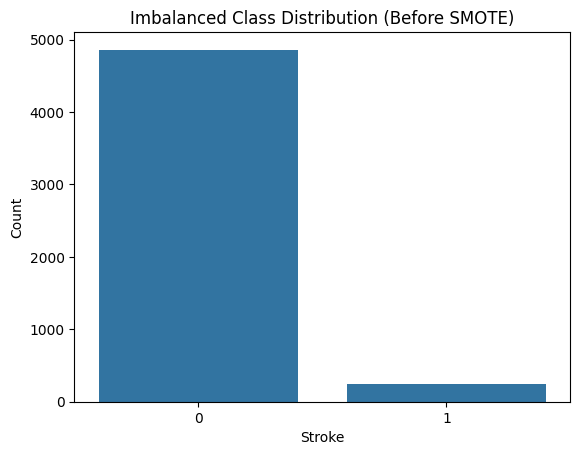

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
class_counts = data['stroke'].value_counts()
print(class_counts)

# Visualization
plt.figure()
sns.countplot(x='stroke', data=data)
plt.title("Imbalanced Class Distribution (Before SMOTE)")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.show()


Balance the dataset using Synthetic Minority Over-sampling Technique (SMOTE)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Drop unnecessary ID column
data = data.drop(columns=['id'])

# Handle missing BMI values
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Encode categorical variables
label_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()

for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE ONLY on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


C:\Users\siddh\AppData\Local\Temp\ipykernel_14568\3244797451.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


Visualization After SMOTE

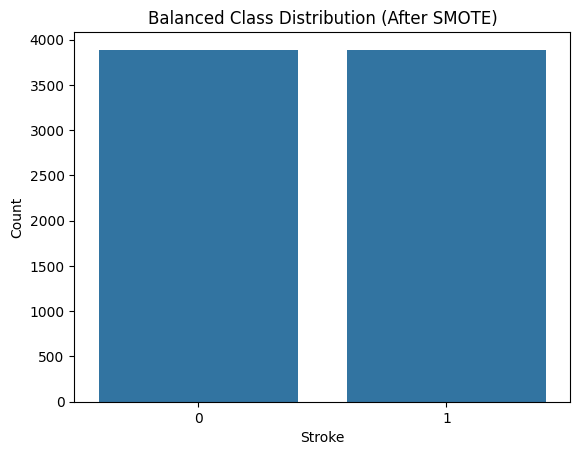

In [16]:
plt.figure()
sns.countplot(x=y_train_smote)
plt.title("Balanced Class Distribution (After SMOTE)")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.show()


Classification Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = model.predict(X_test)


Evaluation Metrics

In [18]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[766 206]
 [ 14  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       972
           1       0.15      0.72      0.25        50

    accuracy                           0.78      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.94      0.78      0.84      1022

